<a href="https://colab.research.google.com/github/DishaAndre/Machine_Learning/blob/main/ML_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load Dataset
df = pd.read_csv('/content/sample_data/test_Y3wMUE5_7gLdaTN.csv')

In [10]:
# Initial check
print(df.shape)
df.info()
df.describe()
print(df.isnull().sum())

(367, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
Applic

In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


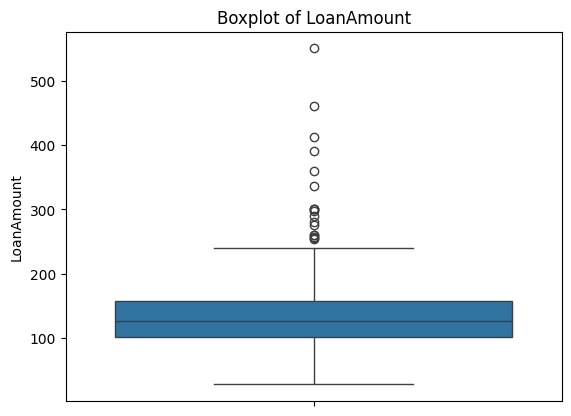

In [12]:
# Outlier detection and removal in LoanAmount
sns.boxplot(df['LoanAmount'])
plt.title('Boxplot of LoanAmount')
plt.show()

Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]


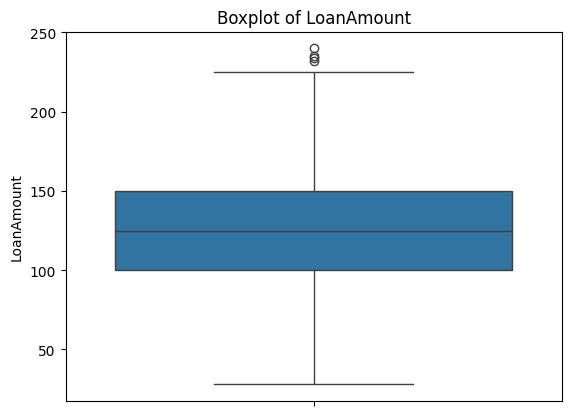

In [13]:
sns.boxplot(df['LoanAmount'])
plt.title('Boxplot of LoanAmount')
plt.show()

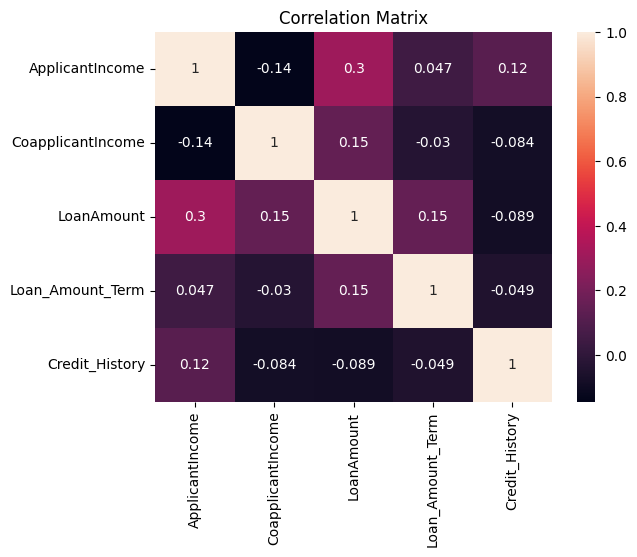

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

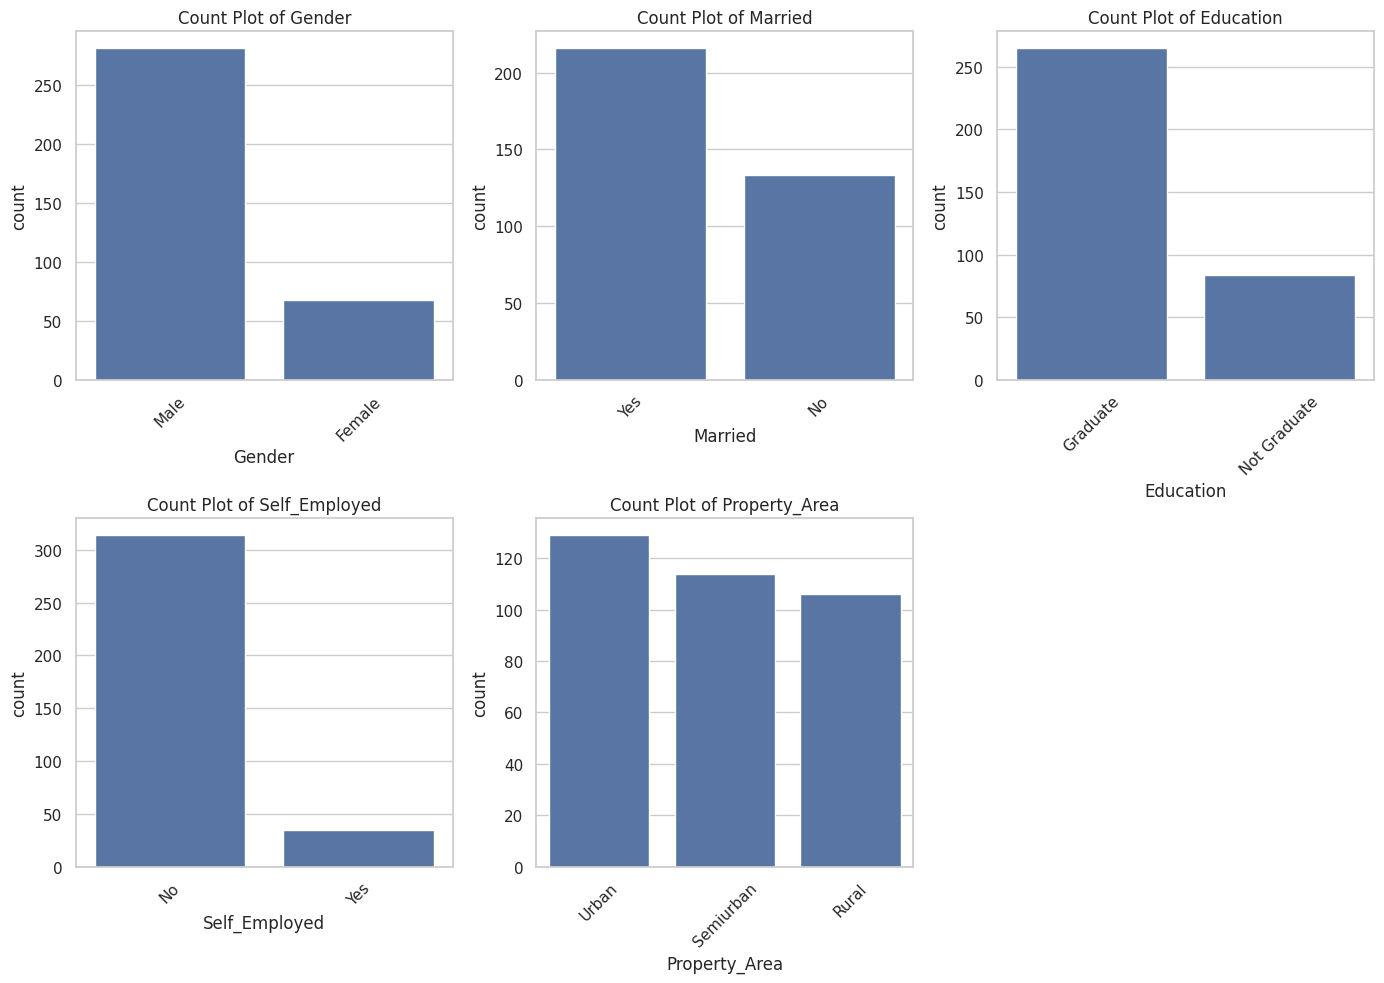

In [15]:
# Set style
sns.set(style = 'whitegrid')
plt.figure(figsize = (14, 10))

# List of categorical columns to plot
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Loop to plot each count plot
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x = col, data = df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

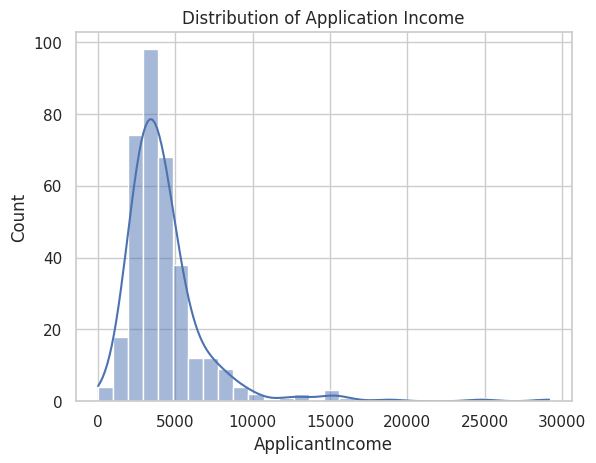

In [16]:
# Distribution of application income
sns.histplot(df['ApplicantIncome'], bins = 30, kde = True)
plt.title('Distribution of Application Income')
plt.show()

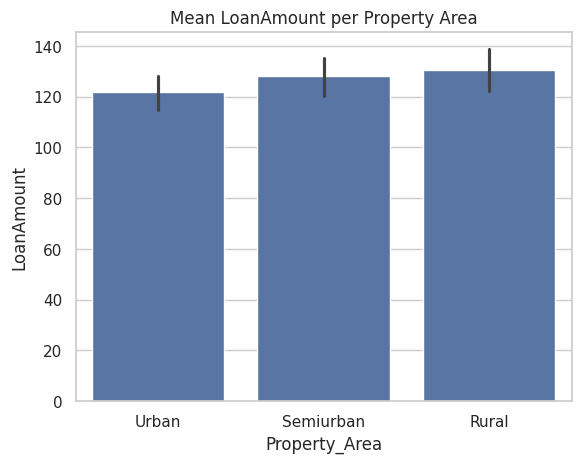

In [17]:
# Mean LoanAmount per property area
sns.barplot(x = 'Property_Area', y = 'LoanAmount', data = df)
plt.title('Mean LoanAmount per Property Area')
plt.show()

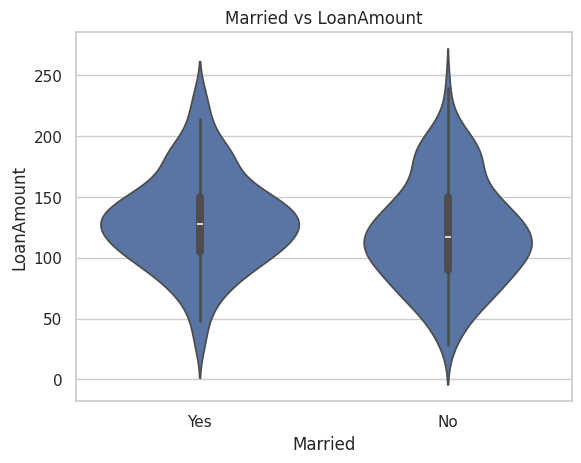

In [19]:
sns.violinplot(x = 'Married', y = 'LoanAmount', data = df)
plt.title('Married vs LoanAmount')
plt.show()

In [26]:
# Convert categorical columns to numeric

df_encoded = pd.get_dummies(df, drop_first = True)

In [35]:
# Normalize features for chi2
from sklearn.preprocessing import MinMaxScaler


X = df_encoded.drop('Credit_History', axis = 1)
y = df_encoded['Credit_History'].astype(int)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [36]:
from sklearn.feature_selection import chi2, SelectKBest

selector = SelectKBest(chi2, k = 5)
X_new = selector.fit_transform(X_normalized, y)

selected_kbest_features = X.columns[selector.get_support()]
print("Selected K-Best Features:", selected_kbest_features)

Selected K-Best Features: Index(['CoapplicantIncome', 'Dependents_1', 'Dependents_3+',
       'Self_Employed_Yes', 'Property_Area_Urban'],
      dtype='object')


In [38]:
from sklearn.feature_selection import SelectPercentile

percentile_selector = SelectPercentile(score_func = chi2, percentile = 50)
X_percentile = percentile_selector.fit_transform(X_normalized, y)

selected_percentile_features = X.columns[percentile_selector.get_support()]
print("Top 50% features using SelectPercentile: ", selected_percentile_features.tolist())

Top 50% features using SelectPercentile:  ['CoapplicantIncome', 'Married_Yes', 'Dependents_1', 'Dependents_3+', 'Self_Employed_Yes', 'Property_Area_Urban']


In [39]:
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0.01)
X_var = var_thresh.fit_transform(X_normalized)

selected_var_features = X.columns[var_thresh.get_support()]
print("Features with variance above 0.01: ", selected_var_features.tolist())

Features with variance above 0.01:  ['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']


In [40]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_normalized, y)
mi_series = pd.Series(mi_scores, index = X.columns).sort_values(ascending = False)

print("Mutual Information Scores:")
print(mi_series)

Mutual Information Scores:
Loan_Amount_Term           0.021964
Property_Area_Urban        0.019544
Dependents_3+              0.018521
Self_Employed_Yes          0.012577
CoapplicantIncome          0.011436
Gender_Male                0.000000
LoanAmount                 0.000000
ApplicantIncome            0.000000
Married_Yes                0.000000
Dependents_2               0.000000
Dependents_1               0.000000
Education_Not Graduate     0.000000
Property_Area_Semiurban    0.000000
dtype: float64
